In [1]:
import numpy as np

sample_x = list(range(2000, 2020))
sample_x = np.array(sample_x)

sample_y = [10.7, 10.6, 10.3, 10.1, 9.8, 9.5, 7.5, 6.8, 6.5, 6.5, 6.3, 6.3, 6.2, 5.9, 5.6, 5.4, 5.4, 5.3, 5.3, 5.2]
sample_y = np.array(sample_y)
n = len(sample_x)
len(sample_x), len(sample_y)

(20, 20)

Выборочные оценки числовых характеристик распределения

In [2]:
x_with_line = sample_x.mean()
Sx_2 = sample_x.var()
Sx = sample_x.std()
x_with_line, Sx_2, Sx

(2009.5, 33.25, 5.766281297335398)

In [3]:
y_with_line = sample_y.mean()
Sy_2 = sample_y.var()
Sy = sample_y.std()
y_with_line, Sy_2, Sy

(7.260000000000001, 3.9803999999999986, 1.995093982748682)

In [4]:
xy_with_line = np.sum(sample_x * sample_y) / n
K_xy = xy_with_line - x_with_line * y_with_line
r_xy = K_xy / (Sx * Sy)
xy_with_line, K_xy, r_xy

(14578.240000000002, -10.729999999999563, -0.9326969108668247)

Точечная диаграмма распределения

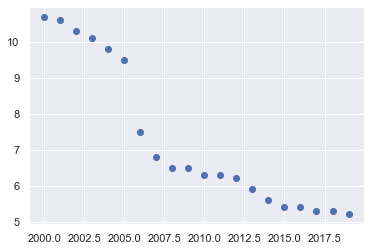

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
plt.scatter(sample_x, sample_y)
plt.savefig('Точечная диаграмма распределения.png');

Составление уравнения регрессии

$y = ax + b \\$;


$
\begin{cases}
\sum x a + n b = \sum y,\\
a \sum x^2 + b \sum x = \sum y x
\end{cases}
$

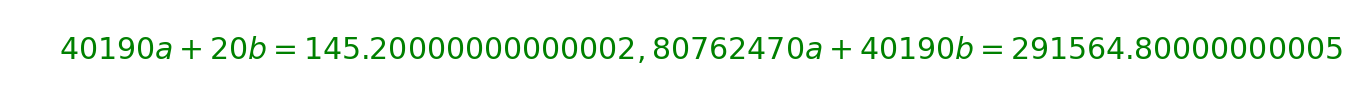

In [6]:
def print_latex(expression, size= 30, color='green'):
    ax = plt.axes([0,0,0.3,0.3])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.4,0.4,'$%s$' % expression, size=size, color=color)

print_latex(fr'{sample_x.sum()} a + {n} b = {sample_y.sum()}, {np.sum(sample_x ** 2)} a + {sample_x.sum()} b = {np.sum(sample_x * sample_y)}')

In [7]:
M1 = np.array([[sample_x.sum(), n],
               [np.sum(sample_x ** 2), sample_x.sum()]]) # Матрица (левая часть системы)
v1 = np.array([sample_y.sum(), np.sum(sample_x * sample_y)]) # Вектор (правая часть системы)
a, b = np.linalg.solve(M1, v1)
a, b

(-0.32270676691389866, 655.7392481134793)

In [8]:
y = a * sample_x + b
print_latex(rf'y = {a} x + {b}')

Построение функции регрессии

In [9]:
plt.scatter(sample_x, sample_y)
plt.plot(sample_x, y)
plt.savefig('Построение функции регрессии.png');

Среднеквадратичная ошибка

In [10]:
np.sum((sample_y - y) ** 2), np.sqrt(np.sum((sample_y - y) ** 2)), np.sqrt(np.sum((sample_y - y) ** 2)) / n

(10.355127819549141, 3.2179384424735566, 0.16089692212367784)

Адекватность регрессионной модели

In [11]:
# Найдём коэфф. детерминации
R2 = np.sum((y - y_with_line) ** 2) / np.sum((sample_y - y_with_line) ** 2)
# R:2 -> 1, значит ур. регрессии хорошо описывает данные.
R2

0.8699235275222833

In [14]:
from scipy import stats
F = R2 * (n - 2) / (1 - R2)
F_ = stats.f.ppf(0.95, 1, n - 2)
if F > F_:
    print(f'{F} > {F_} значит признается статистическая значимость и надежность уравнения')
else:
    print(f'{F} < {F_} значит не признается статистическая значимость и надежность уравнения')

120.38013637003853 > 4.413873419170566 значит признается статистическая значимость и надежность уравнения


Интервальная оценка прогнозов

In [51]:
# Точное предсказание
y_tilda = a * 2021 + b
y_tilda

3.5488721804900933

In [52]:
# Уровень значимости
alpha = 0.05
alpha

0.05

In [53]:
# t_p(k) – квантиль распределения Стьюдента
# При K = n - 2 = 18 и p = 1 - alpha = 0.05
# t = stats.t(df=18).ppf(0.05)
t = stats.t(df=n - 2).ppf(1 - 0.05)
t

1.7340636066175354

In [54]:
# Средняя ошибка в прогнозе
mu = Sy / Sx * np.sqrt((1 - R2) / (n - 2) * ((n + 1) * Sx_2 + (2021 - x_with_line) ** 2))
mu

0.8476185941497107

In [55]:
# Прогнозируемое значение с доверительной вероятностью
p = 1 - alpha
# принадлежит интервалу прогноза:
(y_tilda - t * mu, y_tilda + t * mu)

(2.0790476240827607, 5.018696736897426)

Вывод – в данном случае прогноз по линейной модели соответствует характеру изменений опытных данных